<a href="https://colab.research.google.com/github/khaeraniazi/khaerani/blob/master/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Project 
##### final project kali ini menggunakan dataset Feedback karyawan Telkomsel terkait IT pada tahun 2022. Project kali ini akan membuat sistem pengklasifikasian sentiment positif, negatif, dan atau netral terhadap feedback yang telah diberikan. nantinya hasil model kali ini dapat digunakan untuk memprediksi sentiment pada feedback yang baru.

Penjelasan Dataset : 
1. Apakah ada saran atau masukan untuk IT / Do you have suggestions or feedback for IT? --> ini adalah column feedback yang diisi user.
2. Hastag1 --> 
3. Hastag2 --> 
4. Sentiment --> Sentiment berupa positif, negativ, atau netral terhadap feedback yang diberikan oleh user.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
import os
# ganti alamat penyimpanan file pada drive
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/Colab Notebooks/Training/Final Project") #viny drive

fileNames = os.listdir()
print(fileNames)
print("Done load list")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['feedback 2022 (1).xlsx', '~$feedback 2022 (1).xlsx', '~$FeedbackIT.xlsx', 'FeedbackIT.xlsx', 'Final Project.ipynb']
Done load list


In [ ]:
df = pd.read_excel("FeedbackIT.xlsx")
df.head()

,No,Apakah ada saran atau masukan untuk IT / Do you have suggestions or feedback for IT?,Hastag1,Hastag2,sentiment decode
0,1,"Menurut saya, IT sudang sangat baik dalam memb...",IT,IT sudah baik,Positif
1,2,Sudah sangat baik,Baik,Servce IT sudah baik,Positif
2,3,Sudah baik,Baik,Servce IT sudah baik,Positif
3,4,Masih terdapat glitch pada saat update passpor...,Laptop,Update passport bermasalah,Positif
4,5,Sejauh ini utk aplikasi layanan IT sudah sanga...,IT,IT sudah baik,Positif


### EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   No         185 non-null    int64 
 1   Feedback   185 non-null    object
 2   Hastag1    185 non-null    object
 3   Hastag2    149 non-null    object
 4   Sentiment  185 non-null    object
dtypes: int64(1), object(4)
memory usage: 7.4+ KB


In [ ]:
df.describe()

,No
count,185.000000
mean,93.000000
std,53.549043
min,1.000000
25%,47.000000
50%,93.000000
75%,139.000000
max,185.000000


In [ ]:
df.shape

(185, 5)

In [ ]:
df.isnull().sum()

No            0
Feedback      0
Hastag1       0
Hastag2      36
Sentiment     0
dtype: int64

In [ ]:
df.set_axis(['No', 'Feedback', 'Hastag1', 'Hastag2', 'Sentiment'], axis='columns', inplace= True)
df

<ipython-input-8-8a63f87a3d26>:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df.set_axis(['No', 'Feedback', 'Hastag1', 'Hastag2', 'Sentiment'], axis='columns', inplace= True)


,No,Feedback,Hastag1,Hastag2,Sentiment
0,1,"Menurut saya, IT sudang sangat baik dalam memb...",IT,IT sudah baik,Positif
1,2,Sudah sangat baik,Baik,Servce IT sudah baik,Positif
2,3,Sudah baik,Baik,Servce IT sudah baik,Positif
3,4,Masih terdapat glitch pada saat update passpor...,Laptop,Update passport bermasalah,Positif
4,5,Sejauh ini utk aplikasi layanan IT sudah sanga...,IT,IT sudah baik,Positif
...,...,...,...,...,...
180,181,"Saat survey, sebaiknya jangan disuruh pilih ba...",Baik,NaN,Negatif
181,182,Sudah baik.,Baik,Servce IT sudah baik,Positif
182,183,Follow up Perbaikan Permasalahan kurang cepat,Cepat,IT harus lebih cepat,Negatif
183,184,orang awam mempermudah pilihan keyword uiux ap...,IT,NaN,Positif


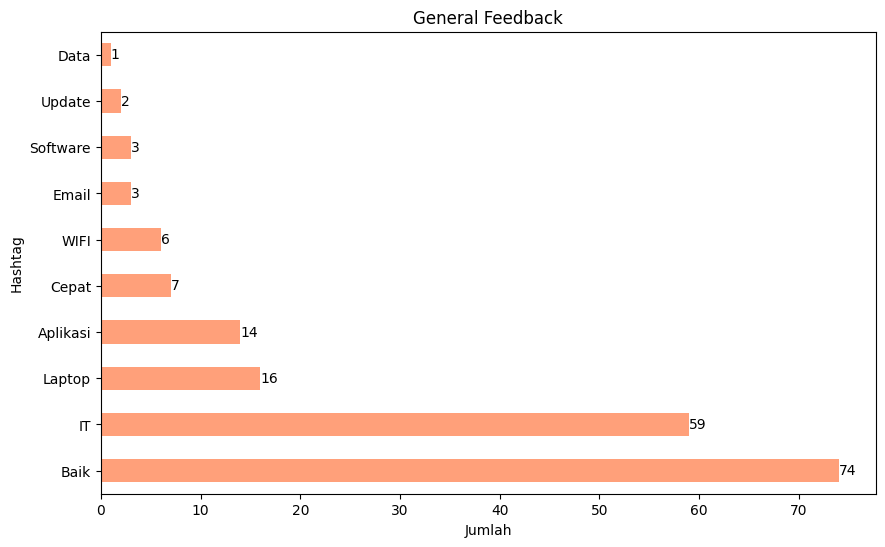

In [ ]:
hashtag_counts = df['Hastag1'].value_counts().head(10)

# Membuat plot barh
fig, ax = plt.subplots(figsize=(10,6))
hashtag_counts.plot(kind='barh', color='#FFA07A', ax=ax)

# Mengatur label dan judul
ax.set_xlabel('Jumlah')
ax.set_ylabel('Hashtag')
ax.set_title('General Feedback')

# Menambahkan label pada data
for i in range(len(hashtag_counts)):
    ax.text(hashtag_counts.iloc[i], i, str(hashtag_counts.iloc[i]), ha='left', va='center')

# Menampilkan plot
plt.show()

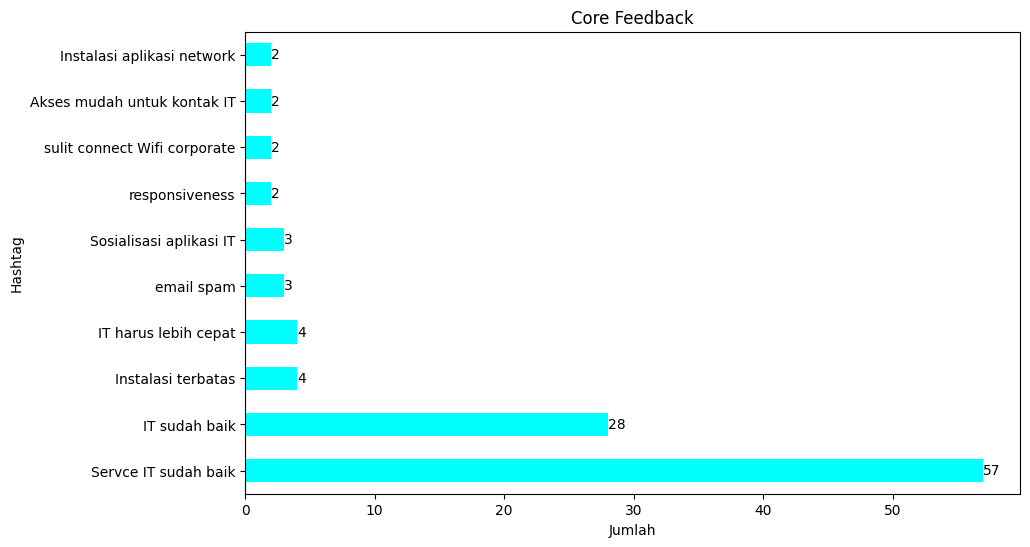

In [ ]:
hashtag_counts = df['Hastag2'].value_counts().head(10)

# Membuat plot barh
fig, ax = plt.subplots(figsize=(10,6))
hashtag_counts.plot(kind='barh', color='#00FFFF', ax=ax)

# Mengatur label dan judul
ax.set_xlabel('Jumlah')
ax.set_ylabel('Hashtag')
ax.set_title('Core Feedback')

# Menambahkan label pada data
for i in range(len(hashtag_counts)):
    ax.text(hashtag_counts.iloc[i], i, str(hashtag_counts.iloc[i]), ha='left', va='center')

# Menampilkan plot
plt.show()

In [ ]:
df['Sentiment'].value_counts()

Positif    146
Negatif     24
Neutral     15
Name: Sentiment, dtype: int64

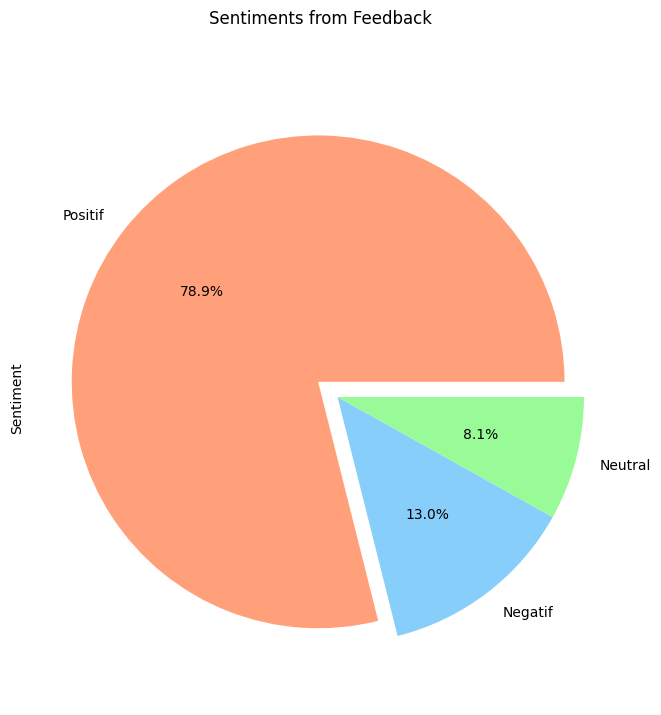

In [ ]:
# df['Sentiment'].value_counts().plot(kind='pie',subplots=True, figsize=(10,6), autopct='%1.1f%%')

colors = ['#FFA07A', '#87CEFA', '#98FB98']  # Contoh palet warna

# Membuat plot pie
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts.plot(kind='pie', subplots=True, figsize=(14,8), autopct='%1.1f%%', colors=colors,title='Sentiments from Feedback', labels=sentiment_counts.index,explode = (0.1, 0, 0))

# Menampilkan plot
plt.show()

### Preprocessing